##**Importing libraries and the data**


In [ ]:
#!pip install googletrans

In [ ]:
import json
import csv
import random
import nltk
#from googletrans import Translator 
import regex as re
from collections import Counter
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from nltk.corpus import stopwords
from string import punctuation

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Importing the data from Kaggle
!pip install kaggle

In [ ]:
!pwd


/content


In [ ]:
#creating a folder .kaggle
!mkdir ~/.kaggle
!rm -rvf ~/.kaggle/*

In [ ]:
#after uploading the kaggle json file, copy it to the kaggle directory
!cp drive/"My Drive"/kaggle.json ~/.kaggle/

In [ ]:
#json file visible
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

 52% 17.0M/32.6M [00:00<00:00, 29.1MB/s]
100% 32.6M/32.6M [00:00<00:00, 73.7MB/s]


In [ ]:
!unzip amazon-reviews-unlocked-mobile-phones.zip

Archive:  amazon-reviews-unlocked-mobile-phones.zip
  inflating: Amazon_Unlocked_Mobile.csv  


In [ ]:
#saving the data
with open("Amazon_Unlocked_Mobile.csv") as csv_file:
  csv_reader = csv.reader(csv_file)
  colnames = next(csv_reader)
  data = list(csv_reader)

#printing one sample point to see how it is saved like
print(random.sample(data,1))
#each entry consists of product name, brand, price (string), rating (in string), review, review votes.


[['LG G3 S Beat D722 8GB White (G3 Mini) Factory Unlocked - International model - No warranty', '', '284.98', '1', "The phone was good and cool the deal with visually. The part i don't appreciate is the fact that it had a international PR in it. That means IT IS NOT GSM it can only allow a handful amount of services that it can acquire. The phone I got had a PR named Claro in it which pissed me off because its in a completely different country so it stopped me from doing anything with phone in USA so i had no choice but to return. The seller left out important facts about the phone so avoid this at all cost!", '3']]


# **Data Cleaning and Preprocessing - Overall Sentiment**

In [ ]:
#extracting initial reviews and ratings from the original data 
initial_reviews = []
ratings = []
review_vote = []  #could be useful later 

for x in data:
  ratings.append(int(x[3]))
  initial_reviews.append(re.sub("[^a-zA-Z0-9\s]", "", re.sub("[#$%&'()*+,-./:;<=>?@[\]^_`{|}~]"," ",x[4].lower())))
  review_vote.append(x[5])

In [ ]:
clean_vote = []
for x in review_vote:
  if x != "":
    clean_vote.append(int(x))
  else: 
    clean_vote.append(0)

In [ ]:
print(random.sample(initial_reviews,10))
print(random.sample(ratings,10))
print(random.sample(clean_vote,10))
print(random.sample(review_vote,10))


['i bought this for my girlfriend s birthday works great and she loves it a lot', 'one call that does the job it is made to make calls  and manage emails in its purest level ', 'first of all  this product sat on the shelf too long before i bought it  thus  when i took it to both apple and verizon to buy insurance  i was told the manufacturer date is too old for us to insure  i e   beyond 60 days  since i knew the people well at my local verizon store  i finally convinced them to insure it  but now it won t hold the icloud password  it is either an internal phone problem or an apple problem  i m probably going to trade this in for a samsung  this was my first apple purchase and i am very disappointed  you may save a few bucks by buying online  but you will be better off in the long run by buying local where the seller will stand behind their product ', 'the delivery time was good  however  the instrument had a defect as some of the keys do not work properly and you have to press hard on

***The Ratings:*** </br>

I will use the ratings as a prediction for the general sentiment for the analysis. There are three classes: Positive, negative and neutral. To increase the accuracy of the model, I will consider positive reviews to have a rating of 4-5, neutral reviews to have a rating of 3, and negative reviews to have a rating of 1-2.

Class 0 := ratings 1-2 </br>
Class 1 := ratings 3 </br>
Class 2 := ratings 4-5



In [ ]:
review_class = []

for x in ratings:
  if x == 1 or x == 2:
    review_class.append(0)
  elif x ==3:
    review_class.append(1)
  else:
    review_class.append(2)

In [ ]:
Counter(review_class).values()

dict_values([284997, 97078, 31765])

***The Reviews:*** </br>


In [ ]:
#the count of top reviews is 123101 out of the 400,000 ones we have (reviews that have been voted for at least once)
count_top_reviews = 0
for x in clean_vote:
  if x>0:
    count_top_reviews+=1
print(count_top_reviews)


123101


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
clean_reviews = []
numbers = [str(i) for i in range(0,10)]

def clean_sentence(string):
  clean_review=[]
  list_of_words = string.split() #get the list of words in each review
  for w in list_of_words:
    if w not in stop_words and w not in numbers and len(w)>1:
      clean_review.append(w)

  return clean_review

for i in range(len(initial_reviews)):
  clean_reviews.append(clean_sentence(initial_reviews[i]))
  
  


In [ ]:
#Getting the Vocab:

initial_vocab = []
for i in range(len(clean_reviews)):
    list_of_words = clean_reviews[i] #get the list of words in each review
    for word in list_of_words:
      initial_vocab.append(word) #add the words to our vocab
     




In [ ]:
#Identify the most common features
num_features = 4000
vocab_with_count = Counter(initial_vocab).most_common(num_features)
vocab = [ word for word, word_count in Counter(initial_vocab).most_common(num_features)]



In [ ]:
#saving vocab 

import pandas as pd

df = pd.DataFrame(data = vocab, columns = ["vocab"])
df.to_csv('drive/My Drive/phonereviewsvocab.csv', index=False)

In [ ]:
print(vocab_with_count[:250])

[('phone', 449049), ('great', 104284), ('good', 101284), ('one', 67149), ('like', 62175), ('screen', 60622), ('use', 57535), ('battery', 56457), ('works', 50764), ('would', 49007), ('get', 48074), ('love', 46983), ('new', 45252), ('work', 41346), ('time', 38402), ('camera', 38215), ('really', 37406), ('price', 37140), ('product', 35149), ('well', 33862), ('sim', 33405), ('bought', 33297), ('phones', 33278), ('card', 31499), ('even', 31016), ('buy', 31002), ('got', 30977), ('back', 29619), ('iphone', 29269), ('excellent', 28616), ('nice', 28043), ('also', 27799), ('apps', 25576), ('quality', 25005), ('fast', 24989), ('used', 24657), ('much', 24526), ('still', 23657), ('better', 23284), ('came', 22848), ('android', 21592), ('first', 21589), ('unlocked', 21315), ('could', 21174), ('problem', 21143), ('everything', 20905), ('using', 20788), ('life', 20769), ('working', 20704), ('samsung', 20558), ('perfect', 20112), ('case', 19715), ('best', 19641), ('far', 19535), ('need', 19298), ('day',

**Taking Samples**

In [ ]:
sample_review = []
sample_ratings = []
sample_votes = []

for i in random.sample(range(len(clean_reviews)), 100000): #taking 10,000 random sample points
  sample_review.append(clean_reviews[i])
  sample_ratings.append(review_class[i])
  sample_votes.append(clean_vote[i])


In [ ]:
for i in random.sample(range(len(sample_review)), 2): #taking 10,000 random sample points
  print(sample_review[i])
  print(sample_ratings[i])
  

['16gb', 'enough', 'find', 'month', 'cant', 'return', 'exchange', 'mad']
0
['great', 'phone', 'think', 'best', 'price', 'value', 'market', 'smartphones']
2


# ***Bag of Words***

In [ ]:
def vectorize(some_list, vocab):
  ### Answer starts here ###
  binary_sentence = []
  
  for word in vocab:
    if word in some_list:
      binary_sentence.append(1)
    else:
      binary_sentence.append(0)

  return binary_sentence

In [ ]:
vectorized_sample_reviews = [vectorize(review,vocab) for review in sample_review]

NameError: ignored

In [ ]:
print(random.sample(vectorized_sample_reviews, 10))

[[1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**`Test and Training Data `**

In [ ]:
X_train = vectorized_sample_reviews[:int(0.8*len(vectorized_sample_reviews))]
y_train = sample_ratings[:int(0.8*len(sample_ratings))]
X_test = vectorized_sample_reviews[int(0.8*len(vectorized_sample_reviews)):]
y_test = sample_ratings[int(0.8*len(sample_ratings)):]

NameError: ignored

In [ ]:
print(random.sample(y_train, 1))

[0]


# ***SVM***

In [ ]:
svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)

svm_y_pred_train = []
svm_y_pred_test = []

for i in range(len(X_train)):
  svm_y_pred_train.append(svm_clf.predict([X_train[i]]))

for i in range(len(X_test)):
  svm_y_pred_test.append(svm_clf.predict([X_test[i]]))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
print(metrics.classification_report(y_train, svm_y_pred_train, digits=3))
print(metrics.classification_report(y_test, svm_y_pred_test, digits=3))

              precision    recall  f1-score   support

           0      0.847     0.841     0.844     18745
           1      0.775     0.262     0.392      6151
           2      0.904     0.973     0.937     55104

    accuracy                          0.887     80000
   macro avg      0.842     0.692     0.724     80000
weighted avg      0.881     0.887     0.873     80000

              precision    recall  f1-score   support

           0      0.797     0.794     0.795      4690
           1      0.464     0.162     0.240      1502
           2      0.890     0.954     0.921     13808

    accuracy                          0.857     20000
   macro avg      0.717     0.636     0.652     20000
weighted avg      0.836     0.857     0.840     20000



In [ ]:

y=re.sub("[^a-zA-Z0-9\s]", "", re.sub("[,.&:-]"," ","The wifi doesn't connect quickly"))


print(svm_clf.predict([vectorize(y.split(), vocab)]))


[0]


In [ ]:
import pickle
from joblib import dump, load
dump(svm_clf, "drive/My Drive/svm.joblib") 


['drive/My Drive/svm.joblib']

In [ ]:
x = 'g'
if (x in vocab):
  print ('y')
  print(vocab.index(x))
else:
  print('n')


vocab[3550]

n


'champ'

# Prediction Teller Function

In [ ]:
def prediction(i):
  if i == 0:
    return "negative"
  elif i == 1:
    return "neutral"
  else:
    return "positive"

# ***Naive Bayes***


In [ ]:
count_of_class_zero = 0
count_of_class_one = 0
count_of_class_two = 0

for e in y_train:
  if e == 0:
    count_of_class_zero +=1
  elif e == 1:
    count_of_class_one +=1
  else:
    count_of_class_two +=1


prob_of_class_zero = count_of_class_zero/len(y_train)
prob_of_class_one = count_of_class_one/len(y_train)
prob_of_class_two = 1 - prob_of_class_zero - prob_of_class_one

#vector that contains the probability of each feature given class zero/one
x_zero_class_zero = []
x_zero_class_one= []
x_zero_class_two= []

x_one_class_zero = []
x_one_class_one = []
x_one_class_two = []

for i in range(num_features):
  count_x_zero_class_zero = 0
  count_x_zero_class_one = 0
  count_x_zero_class_two = 0

  count_x_one_class_zero  = 0
  count_x_one_class_one = 0
  count_x_one_class_two = 0
  
  for j in range(len(X_train)):
    if (X_train[j][i] == 0 and y_train[j] == 0):
      count_x_zero_class_zero +=1
    elif (X_train[j][i] == 0 and y_train[j] == 1):
      count_x_zero_class_one +=1
    elif (X_train[j][i] == 0 and y_train[j] == 2):
      count_x_zero_class_two +=1

    elif (X_train[j][i] == 1 and y_train[j] == 0):
      count_x_one_class_zero +=1
    elif (X_train[j][i] == 1 and y_train[j] == 1):
      count_x_one_class_one +=1
    else:
      count_x_one_class_two+=1
  x_zero_class_zero.append(count_x_zero_class_zero/count_of_class_zero)
  x_zero_class_one.append(count_x_zero_class_one/count_of_class_one)
  x_zero_class_two.append(count_x_zero_class_two/count_of_class_two)


  x_one_class_zero.append(count_x_one_class_zero/count_of_class_zero)
  x_one_class_one.append(count_x_one_class_one/count_of_class_one)
  x_one_class_two.append(count_x_one_class_two/count_of_class_two)


In [ ]:
def naive_bayes(vec):
  product_given_class_zero = 1
  product_given_class_one = 1
  product_given_class_two = 1

  for i in range(len(vec)):
    if vec[i] ==0 :
      product_given_class_zero*=x_zero_class_zero[i]
      product_given_class_one*=x_zero_class_one[i]
      product_given_class_two*=x_zero_class_two[i]
    else:
      product_given_class_zero*=x_one_class_zero[i]
      product_given_class_one*=x_one_class_one[i]
      product_given_class_two*=x_one_class_two[i]
  
  max_prob = max(product_given_class_zero*prob_of_class_zero, product_given_class_one*prob_of_class_one, product_given_class_two*prob_of_class_two)

  if (max_prob == product_given_class_zero*prob_of_class_zero):
    return 0
  elif (max_prob == product_given_class_one*prob_of_class_one):
    return 1
  else:
    return 2

In [ ]:
naive_y_pred_train = []
naive_y_pred_test = []

for i in range(len(X_train)):
  naive_y_pred_train.append(naive_bayes(X_train[i]))

for i in range(len(X_test)):
  naive_y_pred_test.append(naive_bayes(X_test[i]))


In [ ]:
print(metrics.classification_report(y_train, naive_y_pred_train, digits=3))
print(metrics.classification_report(y_test, naive_y_pred_test, digits=3))

              precision    recall  f1-score   support

           0      0.762     0.560     0.646      9478
           1      0.291     0.294     0.293      3038
           2      0.823     0.897     0.859     27484

    accuracy                          0.772     40000
   macro avg      0.625     0.584     0.599     40000
weighted avg      0.768     0.772     0.765     40000

              precision    recall  f1-score   support

           0      0.720     0.552     0.625      2362
           1      0.195     0.185     0.190       777
           2      0.817     0.887     0.851      6861

    accuracy                          0.754     10000
   macro avg      0.577     0.542     0.555     10000
weighted avg      0.746     0.754     0.746     10000



In [ ]:
print(naive_bayes(vectorize(' looks expensive ', vocab)))

2


# ***RFC***

In [ ]:
rfc = RandomForestClassifier(n_estimators=30, max_depth=18, min_samples_split=4)
rfc.fit(X_train, y_train)

rfc_y_pred_train = []
rfc_y_pred_test = []

for i in range(len(X_train)):
  rfc_y_pred_train.append(rfc.predict([X_train[i]]))

for i in range(len(X_test)):
  rfc_y_pred_test.append(rfc.predict([X_test[i]]))


In [ ]:
print(metrics.classification_report(y_train, rfc_y_pred_train, digits=3))
print(metrics.classification_report(y_test, rfc_y_pred_test, digits=3))

              precision    recall  f1-score   support

           0      0.951     0.259     0.408      9478
           1      1.000     0.038     0.073      3038
           2      0.736     0.999     0.848     27484

    accuracy                          0.751     40000
   macro avg      0.896     0.432     0.443     40000
weighted avg      0.807     0.751     0.685     40000

              precision    recall  f1-score   support

           0      0.906     0.217     0.350      2362
           1      1.000     0.006     0.013       777
           2      0.725     0.997     0.840      6861

    accuracy                          0.736     10000
   macro avg      0.877     0.407     0.401     10000
weighted avg      0.789     0.736     0.660     10000



In [ ]:
print(rfc.predict([vectorize(' expensive', vocab)]))

[2]


# **RNN - Sentiment Analysis**

In [ ]:
#reconstructing the vocab, no filtering this time around

#all possible words found in reviews
vocab_v2= []
for rev in clean_reviews:
  for w in rev:
    vocab_v2.append(w)

print(len(vocab_v2))
#sorting the vocab words
sorted_vocab_v2 = [ word for word, word_count in Counter(vocab_v2).most_common(len(vocab_v2))]
print(len(sorted_vocab_v2))
#enumerating all words, in a dictionary, starting from 1 
vocab_to_int = {w:i+1 for i, w in enumerate(sorted_vocab_v2)}




8513882
70770


In [ ]:
print(len(vocab_to_int))

70770


In [ ]:
reviews_to_int = []
max_vocab_length = 20000

for rev in clean_reviews:
  rev_to_int = []
  #turning each word in the review into an int
  #each review becomes a vector of numbers
  for w in rev:
    if vocab_to_int[w] <max_vocab_length:
      rev_to_int.append(vocab_to_int[w])
  while(len(rev_to_int) < len(w)):
       rev_to_int.append(0)
  reviews_to_int.append(rev_to_int)


In [ ]:
print(reviews_to_int[:2])

[[210, 1862, 195, 36, 1, 159, 36, 188, 1, 473, 341, 800, 558, 4, 362, 468, 94, 4, 415, 1086, 1226, 235, 64, 303, 194, 59, 17, 1514, 4209, 125, 36, 1, 58, 59, 356, 10], [31, 1, 31, 2972, 702, 165, 67, 165, 73, 41, 1, 516, 97, 386, 51, 96, 1728, 1322, 781, 2, 1, 50]]


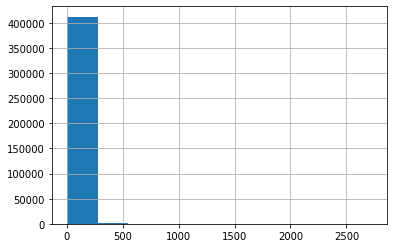

count    413840.000000
mean         21.708890
std          42.408789
min           2.000000
25%           6.000000
50%          10.000000
75%          21.000000
max        2725.000000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

reviews_len = [len(x) for x in reviews_to_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [ ]:
#turning review classes into vectors


In [ ]:
#dropping out all reviews with length 0
review_class_v2 = [review_class[i] for i in range(len(reviews_to_int)) if len(reviews_to_int[i])>0]
reviews_to_int = [reviews_to_int[i] for i in range(len(reviews_to_int)) if len(reviews_to_int[i])>0]
#dropping out all reviews with length higher than 50
review_class_v2 = [review_class[i] for i in range(len(reviews_to_int)) if len(reviews_to_int[i])<=80]
reviews_to_int = [reviews_to_int[i] for i in range(len(reviews_to_int)) if len(reviews_to_int[i])<=80]

In [ ]:

print(len(review_class_v2))
print(len(reviews_to_int))

#this leaves us with more than 300 thousand reviews which is still good!

395393
395393


In [ ]:
#I want a funtion that will pad all reviews to a length of 50
#if a review length <50, we'll add zero. If it is more than 50, I will keep the first few words

def pad_review(review_in_int, length):
  #review_in_int is a list
  new = review_in_int
  while (len(new)<=length):
    new.append(0)

  if (len(new)>length):
    new = new [:length]

  return new

  



In [ ]:
ty = [i for i in range(19)]
print(pad_review(ty,50))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
padded_reviews = [pad_review(r, 80) for r in reviews_to_int]

In [ ]:
print(padded_reviews[:1])

[[210, 1862, 195, 36, 1, 159, 36, 188, 1, 473, 341, 800, 558, 4, 362, 468, 94, 4, 415, 1086, 1226, 235, 64, 303, 194, 59, 17, 1514, 4209, 125, 36, 1, 58, 59, 356, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
sample_review_v2= []
sample_class_v2 = []

len_sample= 100000

for i in random.sample(range(len(padded_reviews)), len_sample): #taking 10,000 random sample points
  sample_review_v2.append(padded_reviews[i])
  sample_class_v2.append(review_class[i])

X_train_v2 = sample_review_v2[:int(0.8*len_sample)]
y_train_v2 = sample_class_v2[:int(0.8*len_sample)]
X_test_v2 = sample_review_v2[int(0.8*len_sample):]
y_test_v2 = sample_class_v2[int(0.8*len_sample):]

In [ ]:
import numpy as np

X_train_v2 = np.array(X_train_v2)
y_train_v2 = np.array(y_train_v2)
X_test_v2 = np.array(X_test_v2)
y_test_v2 = np.array(y_test_v2)

X_train_v2 =  X_train_v2.reshape(80000, 80)
y_train_v2 = y_train_v2.reshape(80000, 1)

In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model=Sequential()
model.add(Embedding(max_vocab_length,100, input_length=80))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 100)           2000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 2,117,635
Trainable params: 2,117,635
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='categorical_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.utils import to_categorical

num_epochs = 3

X_train2, y_train2 = X_train_v2, y_train_v2
model.fit(X_train2,to_categorical(y_train2), epochs=num_epochs)

Epoch 1/3
2500/2500 [==============================] - 184s 73ms/step - loss: 0.7950 - accuracy: 0.6924
Epoch 2/3
2500/2500 [==============================] - 185s 74ms/step - loss: 0.7914 - accuracy: 0.6925
Epoch 3/3
2500/2500 [==============================] - 184s 73ms/step - loss: 0.7908 - accuracy: 0.6927


# Aspect Based Sentiment Analysis

In [ ]:
#getting the raw reviews, no removing punctuation or anything
raw_reviews = []

for x in data:
  raw_reviews.append(x[4].lower())

print(raw_reviews[6])

NameError: ignored

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
#function that extracts the aspects, appends all sentences that contain these words together
#then returns the sentences 

def extract_aspects(string):
  obj_and_subj= []
  sentence_of_obj_and_subj = []
  sentences_in_review = string.split('.')
  for s in sentences_in_review:
    doc = nlp(s)  
    for chunk in doc.noun_chunks:
     if (chunk.root.dep_ == 'dobj' or chunk.root.dep_== 'nsubj')  and  chunk.root.text not in stop_words and len(chunk.root.text)>1:
        objects_in_review.append(chunk.root.text)
  
  for obj in objects_in_review:
   all_sentences = ''
   for s in sentences_in_review:
    if obj in s:
     all_sentences+= s + ' '
   sentence_of_object.append(all_sentences)

   return obj_and_subj,sentence_of_obj_and_subj

In [ ]:
aspects, sentences_of_aspects = extract_aspects(raw_reviews[6])

NameError: ignored

In [ ]:
for i in range(len(sentence_of_object)):
  x = re.sub("[^a-zA-Z0-9\s]", "", re.sub("[#$%&'()*+,-./:;<=>?@[\]^_`{|}~]"," ","the battery is shit"))
  y = prediction(svm_clf.predict([vectorize(clean_sentence(x), vocab)]))

  print("For " + objects_in_review[i] + " the sentiment is " + y)

  print(prediction(svm_clf.predict([vectorize(clean_sentence("the battery is shit"), vocab)])))

For battery the sentiment is positive
positive
For phone the sentiment is positive
positive
